<a href="https://colab.research.google.com/github/sulaksh26/SportsDunia/blob/main/SportsDunia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview**
1. Data Loading
->Imported the Excel file using pandas.

->Inspected and cleaned column names by removing spaces and newlines.

2. Data Cleaning
->Dropped empty rows and unnecessary unnamed columns.

->Parsed date columns: Instance Date, Last Lead Act, and Form Initiate.

->Standardized string fields like Course, Lead Stage, Paid Applicant to uppercase, making data consistent.

3. Descriptive Statistics
->Counted total number of records.

->Identified missing values across all columns.

->Displayed frequency distributions for:

a.Lead Stages (e.g., Cold, Warm)

b.Courses (e.g., BBA, B.Tech.)

c.Paid Applicant status (Yes / No)

4. Time-Based Analysis
->Created monthly trends using Instance Date.

->Visualized how many leads were generated each month using a bar chart.

5. Course vs Enrollment Analysis
->Compared each Course against how many leads converted to Paid Applicants.

->Plotted a stacked bar chart for easy comparison of conversion performance.

6. Funnel Visualization
->Counted how many leads fell into each Lead Stage (e.g., Cold, Untouched, Not Interested).

->Created a bar chart to represent lead pipeline stages.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Excel file
file_path = '/content/drive/MyDrive/Sports Dunia  -  BA/Dump2 (1) (1) (1) (1) (1) (1) (1) (1).xlsx'
df = pd.read_excel(file_path)

In [3]:
#Clean Column Names
df.columns = df.columns.str.strip().str.replace('\n', ' ').str.replace('  ', ' ')

In [4]:
#Drop empty rows and columns
df = df.dropna(how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [5]:
#Convert date columns
date_columns = ['Instance Date', 'Last Lead Act', 'Form Initiate']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [6]:
#Standardize string columns
for col in ['Course', 'Specialization', 'Lead Stage', 'Lead Status', 'Paid Applicant', 'Enrolment Status']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.upper()

In [8]:
#Summary Statistics
print("✅ Total Records:", len(df))
print("\n🔸 Missing Values:\n", df.isnull().sum())
print("\n🔸 Lead Stage Breakdown:\n", df['Lead Stage'].value_counts())
print("\n🔸 Course Distribution:\n", df['Course'].value_counts())
print("\n🔸 Paid Applicant Status:\n", df['Paid Applications'].value_counts())

✅ Total Records: 50000

🔸 Missing Values:
 Name                           0
Email                          0
Mobile                         0
Lead Origin                    0
Country                        0
State                          0
City                           0
Instance                       0
Instance Date                  0
Campaign                       0
Lead Stage                     0
Lead Status                    0
Registration Device        49643
Course                         0
Specialization                 0
Campus                         0
Last Lead Activity Date        0
Form Initiated             49189
Paid Applications          49757
Enrolment Status               0
dtype: int64

🔸 Lead Stage Breakdown:
 Lead Stage
UNTOUCHED                19037
COLD                     14887
NO RESPONSE               9520
NOT INTERESTED            3350
WARM                      1417
INVALID                   1278
APPLICATION SUBMITTED      247
NOT ELIGIBLE               155

/tmp/ipython-input-9-1872314942.py:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


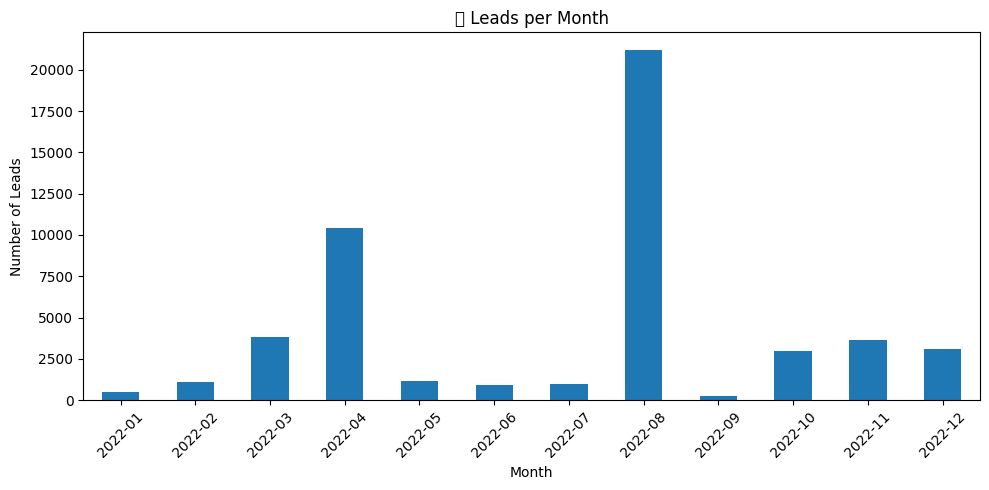

In [9]:
# Leads over Time
if 'Instance Date' in df.columns:
    df['Month'] = df['Instance Date'].dt.to_period('M')
    leads_per_month = df.groupby('Month').size()
    leads_per_month.plot(kind='bar', figsize=(10,5), title="📆 Leads per Month")
    plt.ylabel("Number of Leads")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [12]:
#Course vs Enrolment
if 'Course' in df.columns and 'Paid Applicant' in df.columns:
    course_enroll = df.groupby('Course')['Paid Applicant'].value_counts().unstack().fillna(0)
    course_enroll.plot(kind='bar', stacked=True, figsize=(12, 6), title="📚 Course vs Paid Applicant")
    plt.ylabel("Number of Leads")
    plt.xlabel("Course")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-11-640633712.py:6: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


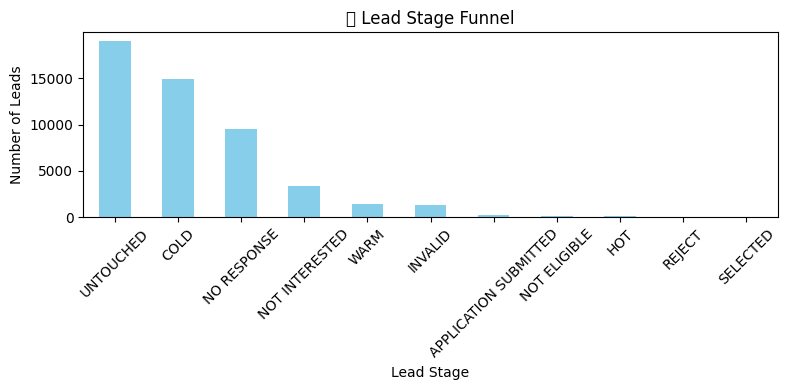

In [11]:
#Lead Stage Funnel
if 'Lead Stage' in df.columns:
    df['Lead Stage'].value_counts().plot(kind='bar', color='skyblue', figsize=(8,4), title="🧊 Lead Stage Funnel")
    plt.ylabel("Number of Leads")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
# Top States and Cities
if 'State' in df.columns:
    print("\n🗺️ Top States:\n", df['State'].value_counts().head(10))

if 'City' in df.columns:
    print("\n🏙️ Top Cities:\n", df['City'].value_counts().head(10))


🗺️ Top States:
 State
Karnataka         23865
Uttar Pradesh      6149
Andhra Pradesh     2993
Telangana          2641
Tamil Nadu         2386
Bihar              2255
West Bengal        2060
Madhya Pradesh     2031
Kerala             1395
Rajasthan          1139
Name: count, dtype: int64

🏙️ Top Cities:
 City
Bengaluru Rural       19644
Hyderabad              2195
Kolkata                1306
Chennai                1053
Lucknow                 857
Patna                   805
New Delhi               498
Indore                  462
City Not Available      455
Kanpur                  450
Name: count, dtype: int64
